In [124]:
import tomopy
import dxchange
import matplotlib.pyplot as plt
import numpy as np

In [135]:
def pad_recon(proj, rotation_axis, theta):
    
    N = proj.shape[2]
    proj_pad = np.zeros([proj.shape[0],proj.shape[1],3*N//2],dtype = "float32")
    proj_pad[:,:,N//4:5*N//4] = proj
    proj_pad[:,:,0:N//4] = np.reshape(proj[:,:,0],[proj.shape[0],proj.shape[1],1])
    proj_pad[:,:,5*N//4:] = np.reshape(proj[:,:,-1],[proj.shape[0],proj.shape[1],1])
    rot_center = rotation_axis + N//4
    
    recon = tomopy.recon(proj_pad, theta = theta, center=rot_center, sinogram_order=False, algorithm = 'gridrec', ncore=16, nchunk=None)
    recon = recon[:,N//4:5*N//4,N//4:5*N//4]
    return recon

## 1. Load data from h5 

In [127]:
fname = 'data.h5'
proj, flat, dark, theta = dxchange.read_aps_32id(fname, sino=(256, 272))

## 2. Flat-filed correction

In [128]:
proj_norm_rings = tomopy.normalize(proj, flat, dark)
proj_norm = tomopy.normalize(proj, flat[0:1], dark[0:1])

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

## 3. Linearization

In [129]:
proj_norm_rings = tomopy.minus_log(proj_norm_rings)
proj_norm = tomopy.minus_log(proj_norm)

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

## 4. Remove negative values

In [130]:
proj_norm_rings = tomopy.remove_nan(proj_norm_rings)
proj_norm = tomopy.remove_nan(proj_norm)

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integerError.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)Error.  nthreads must be a positive integer

## 5. Reconstaruction

In [136]:
recon_rings = pad_recon(proj = proj_norm_rings, rotation_axis = 256, theta = theta)
recon = pad_recon(proj = proj_norm, rotation_axis = 256, theta = theta)

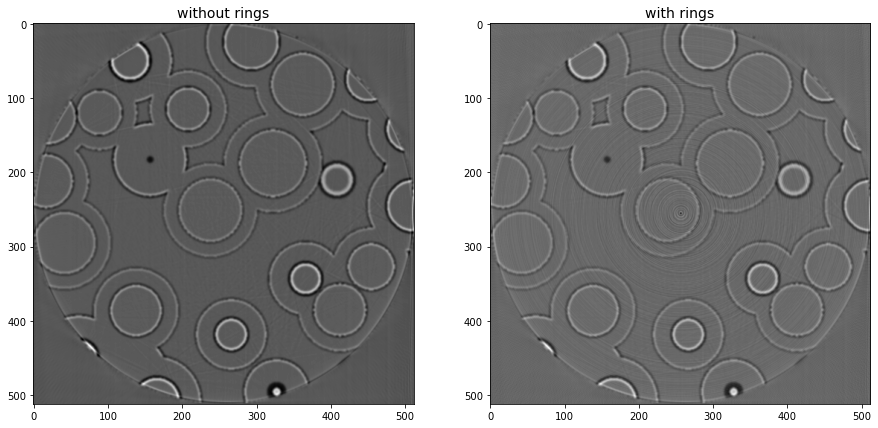

In [141]:
plt.figure(figsize = (15,15))

plt.subplot(1,2,1)
plt.title('without rings', fontsize = '14')
plt.imshow(recon[0, :,:], cmap='gray')

plt.subplot(1,2,2)
plt.title('with rings', fontsize = '14')
plt.imshow(recon_rings[0, :,:], cmap='gray')